In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/loan_dataset_Nm.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#dropping the loan id column because there is no use it for the model building
data.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Data Preprocessing


Handling Categorical Values

In [ ]:
data['Gender']=data['Gender'].map({'Female':1,'Male':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,0.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data['Property_Area']=data['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,0.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,0.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,0.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,0.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y


In [ ]:
data['Married']=data['Married'].map({'Yes':1,'No':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,0.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,0.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,0.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y


In [ ]:
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,No,5849,0.0,NaN,360.0,1.0,2,Y
1,0.0,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,0,N
2,0.0,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,0.0,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,0.0,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,2,Y


In [ ]:
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y


In [ ]:
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [ ]:
data['Married'] = data['Gender'].fillna(data['Married'].mode()[0])

In [ ]:
#replacing + with space for filling the non values
data['Dependents']=data['Dependents'].str.replace('+','')

<ipython-input-18-fa46bdbcafcf>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','')


In [ ]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [ ]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [ ]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])

In [ ]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [ ]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [ ]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 57.7+ KB


In [ ]:
#changing the datatype of each float column to int
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['Coapplicant']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    int64  
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  Coapplicant        614 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 62.5 KB


Data Visualization

Univariate analysis

<ipython-input-28-3d762a4bc053>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='r')


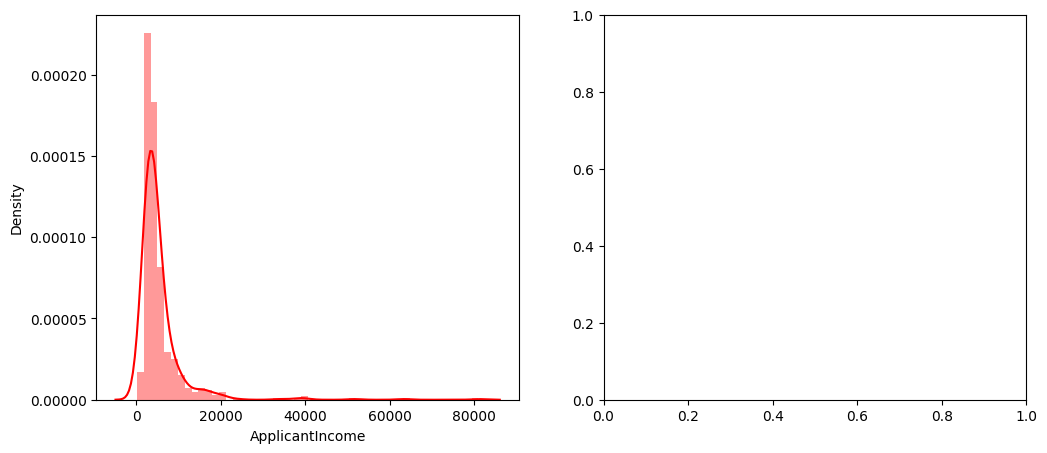

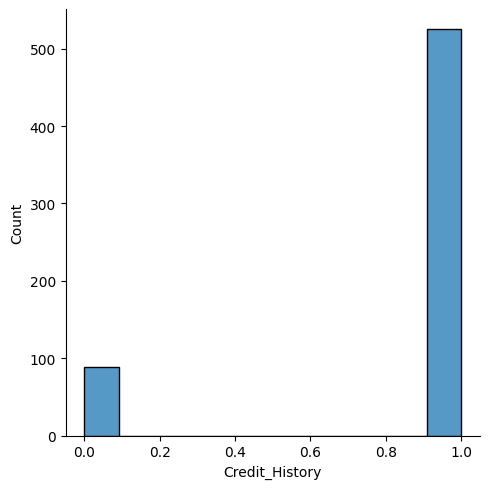

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.displot(data['Credit_History'])
plt.show()

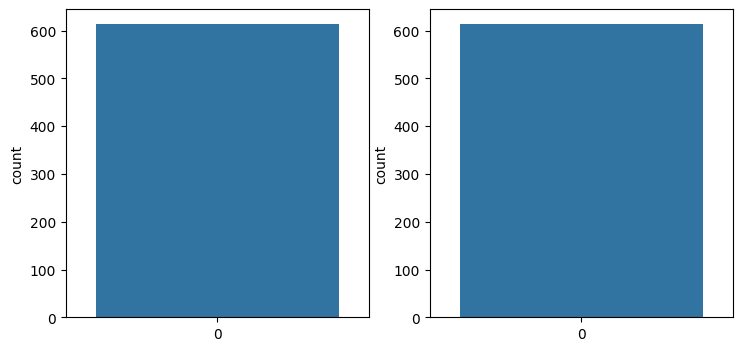

In [ ]:
#ploting the count plot
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

Bivariate analysis

<Axes: xlabel='Property_Area', ylabel='count'>

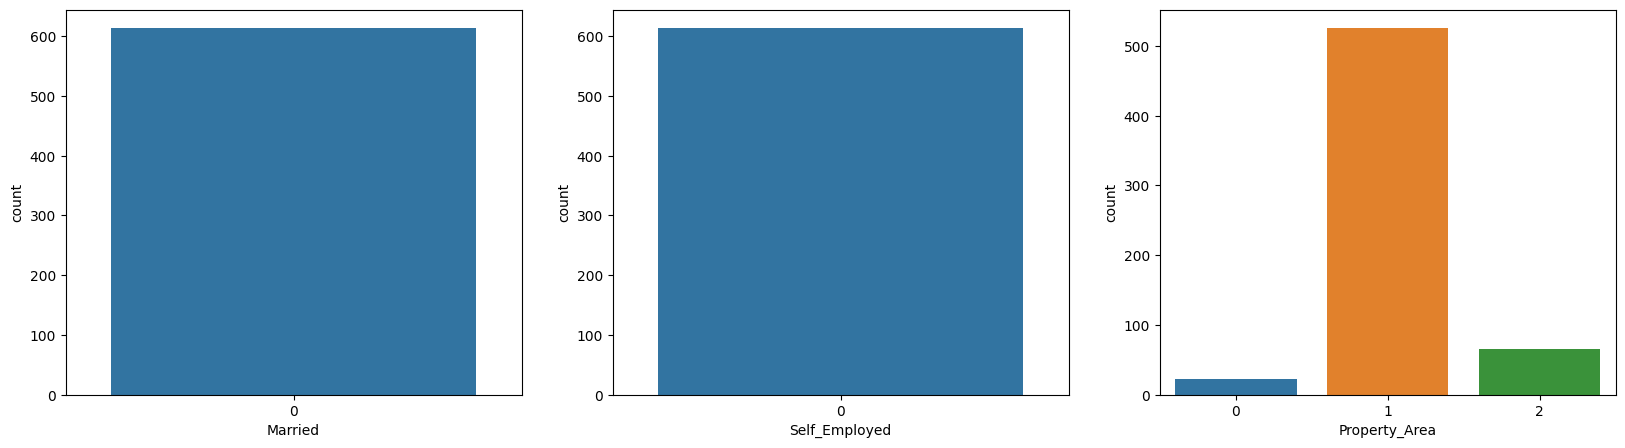

In [ ]:
#visualising two columns againist each other
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['Married'], x=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'], x=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'], x=data['Loan_Amount_Term'])

In [ ]:
#plotted a column using cross tab function
pd.crosstab(data['Gender'],[data['Self_Employed']])

Self_Employed,0,1
Gender,,
0,435,67
1,97,15


Multi variate analysis

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


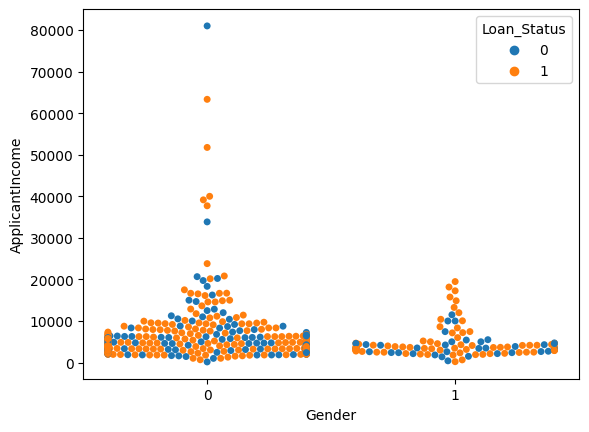

In [ ]:
#visualised based gender and income what would be the applicantion status
sns.swarmplot(x='Gender', y='ApplicantIncome', hue = 'Loan_Status',data=data)

Balancing the Dataset

In [ ]:
#Balancing the dataset by using smote
from imblearn.combine import SMOTETomek

In [ ]:
smote = SMOTETomek()

In [ ]:
#dividing the dataset into dependent and independent y and x respectively
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'],axis=1)

In [ ]:
#shape of x after seperating from the total dataset
x.shape

(614, 12)

In [ ]:
#shape of y
y.shape

(614,)

In [ ]:
#creating a new x and y variables for the balanced set
x_bal,y_bal = smote.fit_resample(x,y)

In [ ]:
#printing the values of y before balancing the data and after
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    345
0    345
Name: Loan_Status, dtype: int64


In [ ]:
names = x_bal.columns

Scalling the dataset

In [ ]:
#performing features scaling operation using standard scaller on x part of the dataset because
#there different type of values in the columns
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)

In [ ]:
x_bal

array([[-0.4331369 , -0.4331369 , -0.65466448, ...,  0.672779  ,
         1.38766481, -0.57500338],
       [-0.4331369 , -0.4331369 , -0.65466448, ...,  0.672779  ,
         1.38766481, -0.57500338],
       [-0.4331369 , -0.4331369 , -0.65466448, ...,  0.672779  ,
         1.38766481,  0.27966713],
       ...,
       [-0.4331369 , -0.4331369 , -0.65466448, ..., -1.4863722 ,
         0.0633374 ,  0.02631061],
       [-0.4331369 , -0.4331369 ,  0.43119728, ..., -1.4863722 ,
        -1.26099001, -0.57500338],
       [ 2.30873888,  2.30873888, -0.65466448, ..., -1.4863722 ,
         0.0633374 , -0.57500338]])

In [ ]:
x_bal = pd.DataFrame(x_bal,columns=names)
x_bal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Coapplicant
0,-0.433137,-0.433137,-0.654664,0.632135,-0.316983,0.153629,-0.575025,-0.273093,0.308752,0.672779,1.387665,-0.575003
1,-0.433137,-0.433137,-0.654664,0.632135,3.154739,-0.368637,-0.575025,-1.031833,0.308752,0.672779,1.387665,-0.575003
2,-0.433137,-0.433137,-0.654664,-1.581941,-0.316983,-0.445080,0.279633,-0.273093,0.308752,0.672779,1.387665,0.279667
3,-0.433137,-0.433137,-0.654664,0.632135,-0.316983,0.181309,-0.575025,0.021972,0.308752,0.672779,1.387665,-0.575003
4,-0.433137,-0.433137,1.517059,0.632135,3.154739,0.074436,0.945818,1.792365,0.308752,0.672779,1.387665,0.945861


In [ ]:
#spliting the dataset in train and test on balanced dataset
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.33, random_state=42)


In [ ]:
X_train.shape

(462, 12)

In [ ]:
X_test.shape

(228, 12)

In [ ]:
y_train.shape, y_test.shape

((462,), (228,))

Model building

In [ ]:
#importing & building the random forest model
def RandomForest(X_train,X_test,y_train,y_test):
  model = RandomForestClassifier()
  model.fit(X_train,y_train)
  y_tr = model.predict(X_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(X_test)
  print(accuracy_score(yPred,y_test))

In [ ]:
#printing the train accuracy and test accuracy respectively
RandomForest(X_train,X_test,y_train,y_test)

1.0
0.8333333333333334


In [ ]:
#importing the building the Decision tree model
def DecisionTree(X_train,X_test,y_train,y_test):
  model = DecisionTreeClassifier()
  model.fit(X_train,y_train)
  y_tr = model.predict(X_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(X_test)
  print(accuracy_score(yPred,y_test))

In [ ]:
#printing the train accuracy and test accuracy respectively
DecisionTree(X_train,X_test,y_train,y_test)

1.0
0.7763157894736842


In [ ]:
#importing and building the KNN model
def KNN(X_train,X_test,y_train,y_test):
  model = KNeighborsClassifier()
  model.fit(X_train,y_train)
  y_tr = model.predict(X_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(X_test)
  print(accuracy_score(yPred,y_test))

In [ ]:
#printing the train accuracy and test accuracy respectively
KNN(X_train,X_test,y_train,y_test)

0.854978354978355
0.7675438596491229


In [ ]:
#importing and building the Xg boost model
def XGB(X_train,X_test,y_train,y_test):
  model = GradientBoostingClassifier()
  model.fit(X_train,y_train)
  y_tr = model.predict(X_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(X_test)
  print(accuracy_score(yPred,y_test))  

In [ ]:
#printing the train accuracy and test accuracy respectively
XGB(X_train,X_test,y_train,y_test)

0.9329004329004329
0.7982456140350878


**ANN**

In [ ]:
#importing necessary tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
classifier = Sequential()
classifier.add(Dense(units=100, activation='relu', input_dim=11))

In [ ]:
classifier.add(Dense(units=50, activation='relu'))

In [ ]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
classifier.fit(X_train,y_train, batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred = y_pred.astype(int)
y_pred

In [ ]:
print(accuracy_score(y_pred)).......

Hyper parameter tuning

In [ ]:
rf = RandomForestClassifier()

In [ ]:
#giving some parameters that can be used in randized search cv
parameters = {
                'n_estimators' : [1,20,30,55,68,74,90,120,115],
                 'criterion':['gini','entropy'],
      'max_depth' : [2,5,8,10], 'verbose' : [1,2,3,4,6,8,9,10]
}

In [ ]:
#performing the randomized cv
RCV = RandomizedSearchCV(estimator=rf,param_distributions=parameters,cv=10,n_iter=4)

In [ ]:
RCV.fit(X_train,y_train)

In [ ]:
#getting the best parameter from the giving list and best score from them
bt_params = RCV.best_params_
bt_score = RCV.best_score_

In [ ]:
bt_params

In [ ]:
bt_score

In [ ]:
#training and test the xg boost model on the best parameters for from the randomized cv
def RandomForest(X_train,X_test,y_train,y_test):
  model = RandomForestClassifier(verbose= 2 , n_estimators= 68, max_features= 'log2',max_depth=5 ,criterion='entropy')
  model.fit(X_train,y_train)
  y_tr = model.predict(X_train)
  print("Training Accuracy")
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(X_test)
  print('Testing Accuracy')
  print(accuracy_score(yPred,y_test))

In [ ]:
model = RandomForestClassifier(verbose= 2 , n_estimators= 68, max_features= 'log2',max_depth=5 ,criterion='entropy')
model.fit(X_train,y_train)

In [ ]:
#printing the train and test accuracy after hyper parameter tuning
RandomForest(X_train,X_test,y_train,y_test)


Saving the model

In [ ]:
#saving the model by using pickle function
pickle.dump(model,open('rdf.pkl','wb'))